# Exercise 1
---
a)

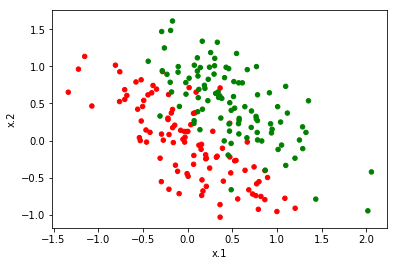

In [1]:
import pandas as pd
import numpy as np
% matplotlib inline
#x.1    x.2  y
df = pd.read_csv('applesOranges.csv')

colors = np.where(df["y"]==0,'r','-')
colors[df["y"]==1] = 'g'

df.plot(kind='scatter', x='x.1', y='x.2', c=colors,)

b)

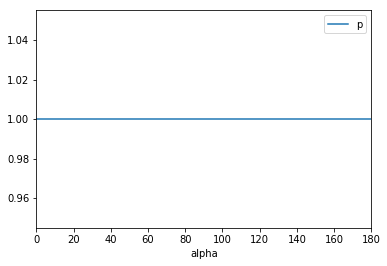

In [2]:
alphas = np.arange(0, 190, 10)
w0 = np.cos(alphas * np.pi / 180)
w1 = np.sin(alphas * np.pi / 180)
ws = np.column_stack((w0, w1))
#print(df[["x.1", "x.2"]])


#sign = lambda h: 1 if h > 0 else 0

def predict(w, bias):
    y_pred = np.sign(np.array(np.dot(df[["x.1", "x.2"]], w)) - bias)
    y_pred[y_pred == -1] = 0
    return y_pred
def getAccuracy(w, bias):
    y_pred = predict(w, bias)
    #print(y_pred)
    return 1 - np.count_nonzero(y_pred - df["y"]) / y_pred.size

def getAccuracyForW(w):
    return getAccuracy(w, 0)
accs = np.apply_along_axis(getAccuracyForW, 1, ws)
acc_df = pd.DataFrame(data=np.array([alphas, accs]).T, columns=["alpha", "p"])
acc_df.plot(x='alpha', y='p')

c)

In [3]:
w_best = ws[np.argmax(accs)]

bias = np.arange(-3, 3, 0.05)

#print(bias)
def getAccuracyForBias(b):
    return getAccuracy(w_best, b)
getAccuracyForBias = np.vectorize(getAccuracyForBias)
accs_b = getAccuracyForBias(bias)

bias_best = bias[np.argmax(accs_b)]
print("The best bias is "+str(bias_best))

The best bias is -3.0


d)

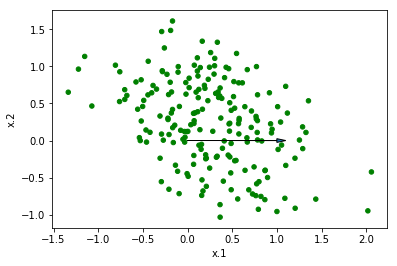

In [5]:
y_pred = predict(w_best, bias_best)

pred_colors = np.where(y_pred==0,'r','-')
pred_colors[y_pred==1] = 'g'

ax = df.plot(kind='scatter', x='x.1', y='x.2', c=pred_colors)
ax.arrow(0, 0, w_best[0], w_best[1], head_width=0.05, head_length=0.1)

the vector w stands orthogonal to the line of seperation between apples and oranges

e)

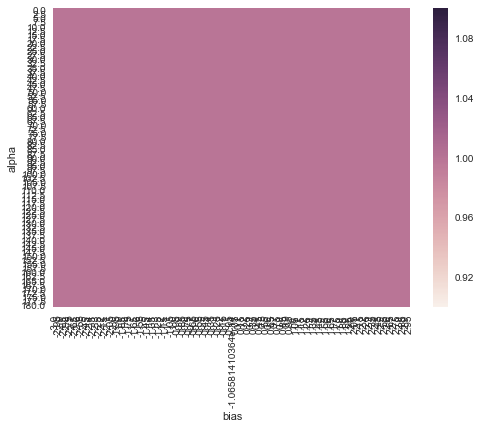

In [6]:
alphas_many = np.arange(0, 181, 2.5)
bias_many = np.arange(-3, 3, 0.05)

alpha_bias = np.transpose([np.tile(bias_many, len(alphas_many)), np.repeat(alphas_many, len(bias_many))])


w0 = np.cos(alpha_bias[:,1] * np.pi / 180)
w1 = np.sin(alpha_bias[:,1] * np.pi / 180)
parameters = np.column_stack((w0, w1, alpha_bias[:,0]))

#print(parameters)

def getAccuracyForVector(p):
    return getAccuracy(p[[0,1]],p[2])

#print(getAccuracy(np.array([0,1]), 3))
#print(getAccuracyForVector(np.array([0,1,3])))

accs_many = np.apply_along_axis(getAccuracyForVector, 1, parameters)
#print(accs_many)

import matplotlib.pyplot as plt
heatmap = pd.DataFrame(data=np.column_stack((alpha_bias[:,1], alpha_bias[:,0], accs_many)), columns=["alpha", "bias", "acc"])
heatmap = heatmap.pivot("alpha", "bias", "acc")
#print(heatmap)
import seaborn as sns
sns.heatmap(heatmap)
#plt.imshow(heatmap, cmap='hot', interpolation='nearest')
#plt.show()


f) The optimization method can not be applied to any problem, because the number of configuration to test increases exponentially with the number of parameters. It would for example not be possible to classify pictures regarding whether or not they show a dog.

# Exercise 2
---
a)

In [ ]:



def multilayer(a, w, b):
    def y_pred(x):
        return np.sum(np.tanh(a*(x - b))*w)
    y_pred = np.vectorize(y_pred)
    return y_pred

def plotFunction(x, y, ax, color="gray"):
    x_y = pd.DataFrame(data=np.array([x, y]).T, columns=["x", "y"])
    return x_y.plot(x="x", y="y", ax=ax, legend=False, color=color)
    

def plotRandoms(a_mean, a_std):
    ax = None
    y_best = None
    err_best = 10000000000

    x = np.arange(-2, 2, 0.05)
    for i in range(0,50):
        a = np.random.normal(a_mean, a_std, 10)
        w = np.random.normal(0, 1, 10)
        b = np.random.uniform(-2, 2, 10)

        y_pred = multilayer(a, w, b)
        y= y_pred(x)

        err = 0.5 * np.sum((y + x) ** 2)
        if (err < err_best):
            y_best = y
            err_best = err

        ax = plotFunction(x, y, ax)
    ax = plotFunction(x, y_best, ax, color="black") 
    plotFunction(x, x*-1, ax, color="red")
plotRandoms(0, 2)

b)

In [ ]:
plotRandoms(0, 0.5)

With a smaller $a$ the term $h = a(x-b)$ becomes smaller. For smaller $h$ $tanh(h)$ is more linear, thus the overall function output is more linear

c) See the black line in the above graphs